In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import randint,uniform
import lightgbm as lgb
from sklearn.metrics import r2_score

train=pd.read_csv('train_F3fUq2S.csv')
test=pd.read_csv('test_Bk2wfZ3.csv')






y = pd.DataFrame(train['click_rate'])
target_column='click_rate'
ID = test['campaign_id']
train.drop(columns=target_column,inplace=True)

train=train.drop(columns=['campaign_id','is_timer'])



numeric_columns=['subject_len', 'body_len', 'mean_paragraph_len','no_of_CTA', 'mean_CTA_len']

# def Outlier_Treatment(df,target_column):
#     #df=df.drop(columns=target_column)
#     num_features=numeric_columns
#     for i in num_features:
#         print(i)
#         upper_limit = df[i].mean() + 3*df[i].std()
#         lower_limit = df[i].mean() - 3*df[i].std()
#         df[i] = np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))
#     return df



In [2]:
train.nunique()

sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
dtype: int64

In [3]:
test.nunique()

campaign_id           762
sender                 12
subject_len           129
body_len              697
mean_paragraph_len     83
day_of_week             7
is_weekend              2
times_of_day            3
category               16
product                39
no_of_CTA              25
mean_CTA_len           59
is_image                5
is_personalised         2
is_quote                6
is_timer                1
is_emoticons            7
is_discount             2
is_price                4
is_urgency              2
target_audience        16
dtype: int64

In [4]:
test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

In [5]:
numeric_columns=['subject_len', 'body_len', 'mean_paragraph_len', 'mean_CTA_len']

array([[<AxesSubplot:title={'center':'subject_len'}>,
        <AxesSubplot:title={'center':'body_len'}>],
       [<AxesSubplot:title={'center':'mean_paragraph_len'}>,
        <AxesSubplot:title={'center':'mean_CTA_len'}>]], dtype=object)

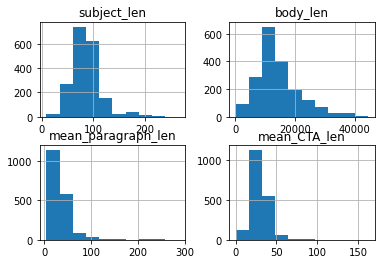

In [6]:
train[numeric_columns].hist()

In [7]:
upper_limit_subject_len = train['subject_len'].mean() + 3*train['subject_len'].std()
lower_limit_subject_len = train['subject_len'].mean() - 3*train['subject_len'].std()
train['subject_len'] = np.where(train['subject_len']>upper_limit_subject_len,upper_limit_subject_len,np.where(train['subject_len']<lower_limit_subject_len,lower_limit_subject_len,train['subject_len']))
upper_limit_body_len = train['body_len'].mean() + 3*train['body_len'].std()
lower_limit_body_len = train['body_len'].mean() - 3*train['body_len'].std()
train['body_len'] = np.where(train['body_len']>upper_limit_body_len,upper_limit_body_len,np.where(train['body_len']<lower_limit_body_len,lower_limit_body_len,train['body_len']))
upper_limit_mean_paragraph_len = train['mean_paragraph_len'].mean() + 3*train['mean_paragraph_len'].std()
lower_limit_mean_paragraph_len = train['mean_paragraph_len'].mean() - 3*train['mean_paragraph_len'].std()
train['mean_paragraph_len'] = np.where(train['mean_paragraph_len']>upper_limit_mean_paragraph_len,upper_limit_mean_paragraph_len,np.where(train['mean_paragraph_len']<lower_limit_mean_paragraph_len,lower_limit_mean_paragraph_len,train['mean_paragraph_len']))
upper_limit_mean_CTA_len = train['mean_CTA_len'].mean() + 3*train['mean_CTA_len'].std()
lower_limit_mean_CTA_len = train['mean_CTA_len'].mean() - 3*train['mean_CTA_len'].std()
train['mean_CTA_len'] = np.where(train['mean_CTA_len']>upper_limit_mean_CTA_len,upper_limit_mean_CTA_len,np.where(train['mean_CTA_len']<lower_limit_mean_CTA_len,lower_limit_mean_CTA_len,train['mean_CTA_len']))

In [8]:
def skewness_removal(df,target_column):
    ##skewness and kurtosiss
    #df=df.drop(columns=target_column)
    num_features=numeric_columns
    skew_features=abs(df[num_features].skew().sort_values(ascending=False))
    a=pd.DataFrame({'Skew':skew_features}).reset_index()
    skewed_column=a[a['Skew']>1]['index'].tolist()
    #df[skewed_column]=np.log(df[skewed_column])
    return skewed_column,a

In [9]:
skewed_column,a=skewness_removal(train,target_column)
skewed_column,a

(['mean_paragraph_len', 'subject_len'],
                 index      Skew
 0  mean_paragraph_len  2.133727
 1         subject_len  1.028063
 2            body_len  0.977592
 3        mean_CTA_len  0.795341)

In [10]:
train['mean_paragraph_len']=np.log(train['mean_paragraph_len'])
train['subject_len']=np.sqrt(train['subject_len'])

array([[<AxesSubplot:title={'center':'subject_len'}>,
        <AxesSubplot:title={'center':'body_len'}>],
       [<AxesSubplot:title={'center':'mean_paragraph_len'}>,
        <AxesSubplot:title={'center':'mean_CTA_len'}>]], dtype=object)

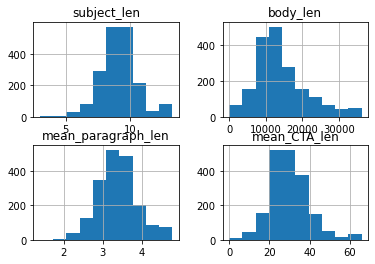

In [11]:
train[numeric_columns].hist()

In [12]:
train['times_of_day']=train['times_of_day'].replace({'Evening':2,'Noon':1,'Morning':0})

In [45]:
sc=MinMaxScaler()
df=pd.DataFrame(sc.fit_transform(train),columns=train.columns)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.2,random_state=42)

In [14]:
#feature selection using OLS 
import statsmodels.api as sm
x_sm = sm.add_constant(train)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x_sm).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             click_rate   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     17.74
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           9.94e-55
Time:                        10:18:31   Log-Likelihood:                 2149.6
No. Observations:                1888   AIC:                            -4259.
Df Residuals:                    1868   BIC:                            -4148.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1773      0

In [15]:
# Is_price is not having significant impact on target column 
# Drop that column 

In [16]:
train.drop(columns=['is_personalised','is_price'],inplace=True)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.2,random_state=42)
import statsmodels.api as sm
x_sm = sm.add_constant(train)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x_sm).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             click_rate   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     19.78
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           7.79e-56
Time:                        10:18:38   Log-Likelihood:                 2149.1
No. Observations:                1888   AIC:                            -4262.
Df Residuals:                    1870   BIC:                            -4162.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1751      0

In [18]:
# Though the p value is high for sender column we will keep these as there is a high variation pf click rate availaible for type 7 sen der


In [28]:
train

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_quote,is_emoticons,is_discount,is_urgency,target_audience
0,3,8.717798,10439.0,3.663562,5,1,1,6,26,3,29.0,0,0,0,0,0,14
1,3,7.348469,2570.0,4.784637,5,1,0,2,11,0,22.0,0,0,0,0,0,10
2,3,7.681146,12801.0,2.772589,5,1,1,2,11,3,23.0,1,1,0,0,0,16
3,3,8.602325,11037.0,3.401197,4,0,2,15,9,4,24.0,0,0,0,0,0,10
4,3,8.944272,10011.0,3.295837,5,1,1,6,26,3,31.0,0,1,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,3,9.380832,1451.0,4.317488,2,0,1,2,11,0,22.0,0,1,0,0,0,10
1884,3,7.615773,10537.0,3.688879,2,0,2,2,11,5,27.0,0,0,0,0,0,11
1885,3,9.433981,11050.0,3.258097,1,0,2,15,9,4,28.0,0,0,0,0,0,6
1886,3,7.615773,10537.0,3.688879,1,0,2,2,11,5,27.0,0,0,0,0,0,16


In [19]:
y_test['click_rate']


1185    0.064904
1054    0.003734
1743    0.021382
1512    0.014385
1460    0.008060
          ...   
141     0.002557
1420    0.021453
674     0.017385
1763    0.011311
339     0.006976
Name: click_rate, Length: 378, dtype: float64

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=100,
                                      bootstrap=True, 
                                      max_depth=37,
                                      max_features='auto',
                                      min_samples_leaf=1,
                                      min_samples_split=2,
                                      n_estimators=300
                        )

In [24]:
# rf=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
#                       max_depth=None, max_features='auto', max_leaf_nodes=None,
#                       max_samples=None, min_impurity_decrease=0.0,
#                       min_impurity_split=None, min_samples_leaf=1,
#                       min_samples_split=2, min_weight_fraction_leaf=0.0,
#                       n_estimators=100, n_jobs=None, oob_score=False,
#                       random_state=None, verbose=0, warm_start=False)

In [25]:
rf.fit(X_train,y_train)
pred=rf.predict(X_test)

r2_score(y_test,pred)

<ipython-input-25-73bd0b13b4f2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.49420579566856726

In [26]:
pred=pd.DataFrame(pred,columns=['click_rate'])
pred

,click_rate
0,0.012786
1,0.018269
2,0.024520
3,0.048654
4,0.036658
...,...
373,0.030253
374,0.079497
375,0.032881
376,0.030303


In [27]:
rf.fit(train,y)

<ipython-input-27-e724201406bc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train,y)


RandomForestRegressor(max_depth=37, n_estimators=300, random_state=100)

In [33]:
train.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product',
       'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_quote', 'is_emoticons',
       'is_discount', 'is_urgency', 'target_audience'],
      dtype='object')

In [43]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 10)]
criterion =['gini', 'entropy']

In [44]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth
               }
random_grid

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 6, 8, 10, 11, 13, 15, 16, 18, 20]}

In [45]:
CV_rfc =GridSearchCV(rf,param_grid=random_grid, cv= 5,scoring='r2')

In [46]:
CV_rfc.fit(train,y)

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\10678313\Anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_valida

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=15, max_features='sqrt',
                                             n_estimators=180),
             param_grid={'max_depth': [5, 6, 8, 10, 11, 13, 15, 16, 18, 20],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160,
                                          180, 200]},
             scoring='r2')

In [47]:
CV_rfc.best_params_

{'max_depth': 18, 'max_features': 'sqrt', 'n_estimators': 60}

In [39]:
#rescoring function 
def score(data,model):
    data=data.drop(columns=['campaign_id','is_timer'])
    #data=Outlier_Treatment(data,target_column)
#     data['subject_len'] = np.where(data['subject_len']>upper_limit_subject_len,upper_limit_subject_len,np.where(data['subject_len']<lower_limit_subject_len,lower_limit_subject_len,data['subject_len']))
#     data['body_len'] = np.where(data['body_len']>upper_limit_body_len,upper_limit_body_len,np.where(data['body_len']<lower_limit_body_len,lower_limit_body_len,data['body_len']))
#     data['mean_paragraph_len'] = np.where(data['mean_paragraph_len']>upper_limit_mean_paragraph_len,upper_limit_mean_paragraph_len,np.where(data['mean_paragraph_len']<lower_limit_mean_paragraph_len,lower_limit_mean_paragraph_len,data['mean_paragraph_len']))
#     #data['no_of_CTA'] = np.where(data['no_of_CTA']>upper_limit_no_of_CTA,upper_limit_no_of_CTA,np.where(data['no_of_CTA']<lower_limit_no_of_CTA,lower_limit_no_of_CTA,data['no_of_CTA']))
#     data['mean_CTA_len'] = np.where(data['mean_CTA_len']>upper_limit_mean_CTA_len,upper_limit_mean_CTA_len,np.where(data['mean_CTA_len']<lower_limit_mean_CTA_len,lower_limit_mean_CTA_len,data['mean_CTA_len']))
#     data['mean_paragraph_len']=np.log(data['mean_paragraph_len'])
#     #data['no_of_CTA']=np.sqrt(data['no_of_CTA'])
#     data['subject_len']=np.sqrt(data['subject_len'])
    data['times_of_day']=data['times_of_day'].replace({'Evening':2,'Noon':1,'Morning':0})
    data['is_price']=np.where(data['is_price']>0,1,0)
    #data['times_of_day']=le.transform(data['times_of_day'])
    #df=pd.DataFrame(sc.transform(data),columns=data.columns)
    df=data
    df=df.drop(columns=['is_price','is_personalised'])
    pred=model.predict(df)
    return pred

In [40]:
pred=score(test,rf)

In [41]:
data=test.drop(columns=['campaign_id','is_timer','is_price','is_personalised'])

In [42]:
pd.DataFrame({'campaign_id':ID,'click_rate':  pred}).set_index('campaign_id').to_csv('submission_Random_forest_without3col_tuned.csv')
pd.Series(rf.feature_importances_,index=data.columns).sort_values(ascending=False)


body_len              0.220979
no_of_CTA             0.122178
mean_paragraph_len    0.121047
mean_CTA_len          0.110617
subject_len           0.095564
category              0.066685
product               0.062398
day_of_week           0.047832
is_image              0.033666
target_audience       0.033188
times_of_day          0.026539
is_quote              0.025746
is_weekend            0.013387
sender                0.013010
is_emoticons          0.003933
is_urgency            0.002991
is_discount           0.000238
dtype: float64